GPU available: []
Original training set shape: (50000, 32, 32, 3), (50000, 1)
Original test set shape: (10000, 32, 32, 3), (10000, 1)
After split -> Train: (40000, 32, 32, 3), Val: (10000, 32, 32, 3)
Training data normalized. Sample pixel value: [0.21960784 0.19607843 0.16470589]
Missing values in training set: 0
Training data class distribution: {np.uint8(0): np.int64(4000), np.uint8(1): np.int64(4000), np.uint8(2): np.int64(4000), np.uint8(3): np.int64(4000), np.uint8(4): np.int64(4000), np.uint8(5): np.int64(4000), np.uint8(6): np.int64(4000), np.uint8(7): np.int64(4000), np.uint8(8): np.int64(4000), np.uint8(9): np.int64(4000)}
Mean pixel value per channel: [0.4910959  0.48214635 0.44657397]
Std deviation per channel: [0.24700749 0.24354412 0.26164266]


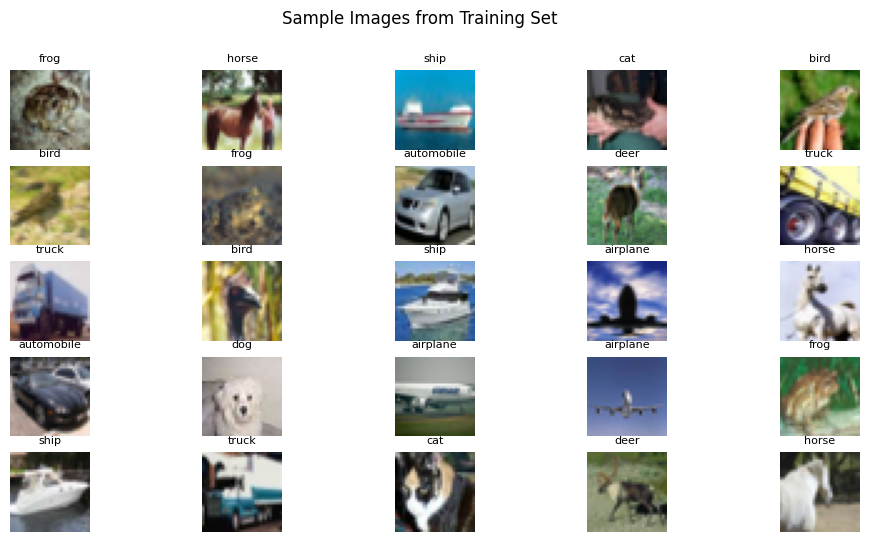

In [ ]:
# ===========================================================
# PHASE 1: CIFAR-10 DATA PREPARATION & EXPLORATION
# ===========================================================

# Step 1: Import Libraries
# TensorFlow: For loading CIFAR-10 dataset (and later for model building)
# scikit-learn: train_test_split to divide data into training and validation sets
# Matplotlib: For visualizing sample images
# NumPy: For numerical operations on image arrays
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Check if GPU is available for faster computations
print("GPU available:", tf.config.list_physical_devices('GPU'))

# ===========================================================
# Step 2: Load CIFAR-10 Dataset
# CIFAR-10 has 60,000 color images (32x32) in 10 classes
# Divided into 50,000 training and 10,000 test images
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(f"Original training set shape: {x_train.shape}, {y_train.shape}")
print(f"Original test set shape: {x_test.shape}, {y_test.shape}")

# ===========================================================
# Step 3: Split training into train + validation
# 80% training, 20% validation
# stratify=y_train ensures class distribution is maintained
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)
print(f"After split -> Train: {x_train.shape}, Val: {x_val.shape}")

# ===========================================================
# Step 4: Normalize Images
# Scale pixel values from 0-255 to 0-1 to improve model training
x_train = x_train.astype('float32') / 255.0
x_val   = x_val.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
print("Training data normalized. Sample pixel value:", x_train[0][0][0])

# ===========================================================
# Step 5: Check for missing values
# Ensures all images have valid numerical data
print("Missing values in training set:", np.sum(np.isnan(x_train)))

# ===========================================================
# Step 6: Descriptive statistics
# Count number of images per class to check dataset balance
# Compute mean and standard deviation of pixel values per channel (RGB)
unique, counts = np.unique(y_train, return_counts=True)
print("Training data class distribution:", dict(zip(unique, counts)))
print("Mean pixel value per channel:", np.mean(x_train, axis=(0,1,2)))
print("Std deviation per channel:", np.std(x_train, axis=(0,1,2)))

# ===========================================================
# Step 7: Visualize some sample images
# Display 25 images from the training set with class labels
# Helps to understand data diversity and verify labels
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(12,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.title(f"{class_names[y_train[i][0]]}", fontsize=8)
    plt.axis('off')
plt.suptitle("Sample Images from Training Set")
plt.show()

` ========================================================


In [ ]:
# ===========================================================
# PHASE 2: BUILDING A FAST CNN FOR CIFAR-10 (UPDATED)
# ===========================================================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# ===========================================================
# Step 1: Initialize the CNN model using Sequential API
# We use Input() to define the input shape, as recommended by Keras
model = Sequential()

# ===========================================================
# Step 2: Convolutional Layer 1 + Batch Normalization + MaxPooling
# 32 filters of size 3x3, ReLU activation, same padding
# BatchNormalization helps stabilize and speed up training
# MaxPooling reduces spatial dimensions (height & width) by 2
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

# ===========================================================
# Step 3: Convolutional Layer 2 + Batch Normalization + MaxPooling
# 64 filters, ReLU activation, same padding
# MaxPooling reduces feature map size
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

# ===========================================================
# Step 4: Convolutional Layer 3 + Batch Normalization
# 128 filters, deeper layer to capture more complex features
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

# ===========================================================
# Step 5: Flatten layer
# Converts 2D feature maps into a 1D vector for fully connected layers
model.add(Flatten())

# ===========================================================
# Step 6: Dense (fully connected) layer
# 128 neurons with ReLU activation
model.add(Dense(128, activation='relu'))

# ===========================================================
# Step 7: Dropout layer
# Randomly disables 50% of neurons to reduce overfitting
model.add(Dropout(0.5))

# ===========================================================
# Step 8: Output layer
# 10 neurons (for 10 classes) with softmax activation for classification
model.add(Dense(10, activation='softmax'))

# ===========================================================
# Step 9: Compile the model
# Adam optimizer with learning rate 0.001
# Sparse categorical crossentropy for multi-class classification
model.compile(optimizer=Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ===========================================================
# Step 10: Display model summary
# Shows layers, output shapes, and number of parameters
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,144,138 (4.36 MB)

 Trainable params: 1,143,690 (4.36 MB)

 Non-trainable params: 448 (1.75 KB)

Data augmentation generator ready.
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 154ms/step - accuracy: 0.2599 - loss: 2.0966 - val_accuracy: 0.4319 - val_loss: 1.5680
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 141ms/step - accuracy: 0.4014 - loss: 1.6161 - val_accuracy: 0.4452 - val_loss: 1.6388
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 137ms/step - accuracy: 0.4802 - loss: 1.4207 - val_accuracy: 0.5248 - val_loss: 1.3190
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.5447 - loss: 1.2765 - val_accuracy: 0.5496 - val_loss: 1.2960
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.5842 - loss: 1.1830 - val_accuracy: 0.5859 - val_loss: 1.1870
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 133ms/step - accuracy: 0.6086 - loss: 1.1243 - val_accuracy: 0.6732 - val_loss: 0.9413
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.6351 - loss: 1.0514 - val_accuracy: 0.6669 - val_loss: 0.9726
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 132ms/step - accuracy: 0.6598 - loss: 0.9948 - va

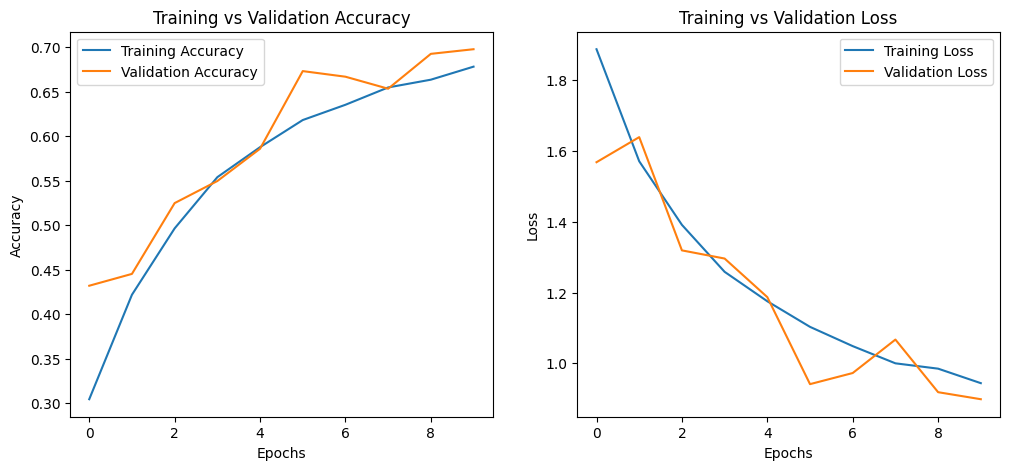

313/313 - 5s - 15ms/step - accuracy: 0.7006 - loss: 0.9015
Test Accuracy: 70.06%
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


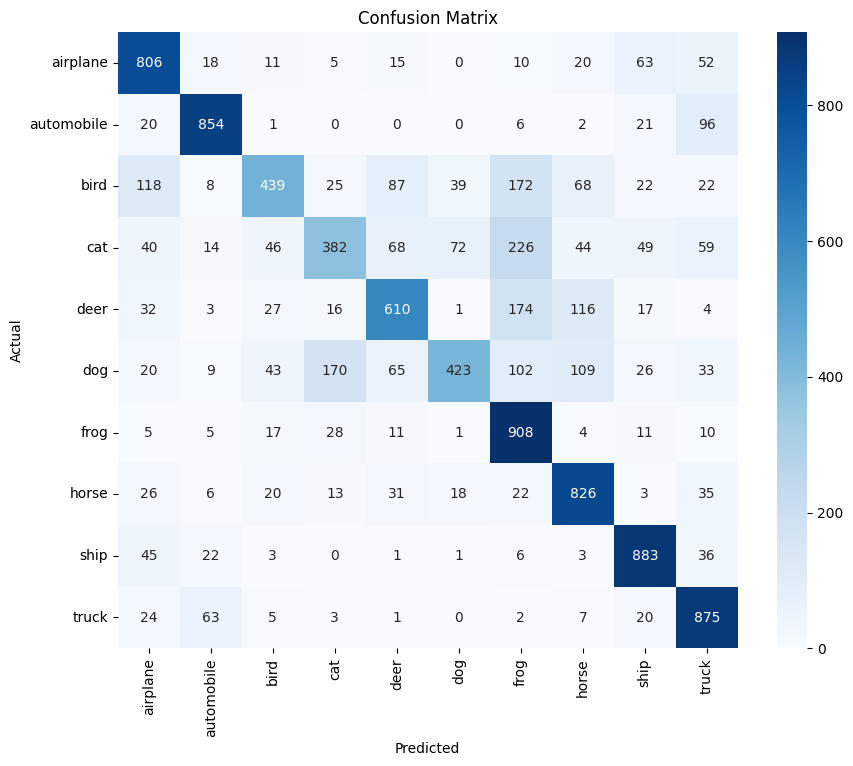

              precision    recall  f1-score   support

    airplane       0.71      0.81      0.75      1000
  automobile       0.85      0.85      0.85      1000
        bird       0.72      0.44      0.54      1000
         cat       0.60      0.38      0.47      1000
        deer       0.69      0.61      0.65      1000
         dog       0.76      0.42      0.54      1000
        frog       0.56      0.91      0.69      1000
       horse       0.69      0.83      0.75      1000
        ship       0.79      0.88      0.83      1000
       truck       0.72      0.88      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.70      0.69     10000



In [ ]:
# ===========================================================
# PHASE 3: TRAINING, EVALUATION, AND METRICS
# ===========================================================

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ===========================================================
# Step 1: Data Augmentation (optional but helps prevent overfitting)
# We apply random transformations to training images:
# rotation, shifting, and horizontal flip
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
# Fit the generator to the training data
datagen.fit(x_train)
print("Data augmentation generator ready.")

# ===========================================================
# Step 2: Train the CNN model
# Using the augmented data, we train the CNN for a few epochs
# validation_data allows monitoring performance on unseen validation set
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,  # You can increase epochs for better performance
    validation_data=(x_val, y_val)
)

# ===========================================================
# Step 3: Plot training and validation accuracy & loss
# This helps visualize learning progress and detect overfitting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# ===========================================================
# Step 4: Evaluate model on test set
# Returns final loss and accuracy on completely unseen data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# ===========================================================
# Step 5: Confusion Matrix
# Compare predicted labels with true labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Choose class with highest probability
y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ===========================================================
# Step 6: Classification Report
# Provides precision, recall, f1-score for each class
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Train shape: (40000, 32, 32, 3), Validation shape: (10000, 32, 32, 3), Test shape: (10000, 32, 32, 3)
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 52ms/step - accuracy: 0.3501 - loss: 1.8245 - val_accuracy: 0.5379 - val_loss: 1.3260
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.4902 - loss: 1.4472 - val_accuracy: 0.5553 - val_loss: 1.2633
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.5114 - loss: 1.3918 - val_accuracy: 0.5725 - val_loss: 1.2194
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.5205 - loss: 1.3533 - val_accuracy: 0.5786 - val_loss: 1.2049
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.5320 - loss: 1.3287 - val_accuracy: 0.5806 - val_loss: 1.1886
Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.5593 - loss: 1.2521 - val_accuracy: 0.6381 - val_loss: 1.0314
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.6148 - loss: 1.0975 - val_accuracy: 0.6655 - val_loss: 0.9535
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.6403 - loss: 1.0244 - val_accuracy: 0.68

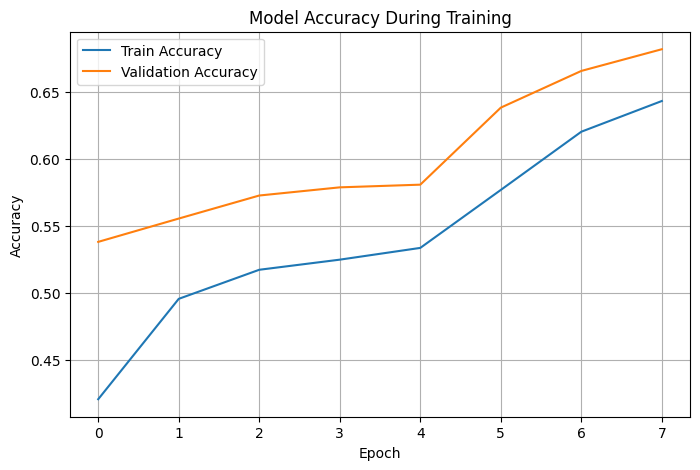

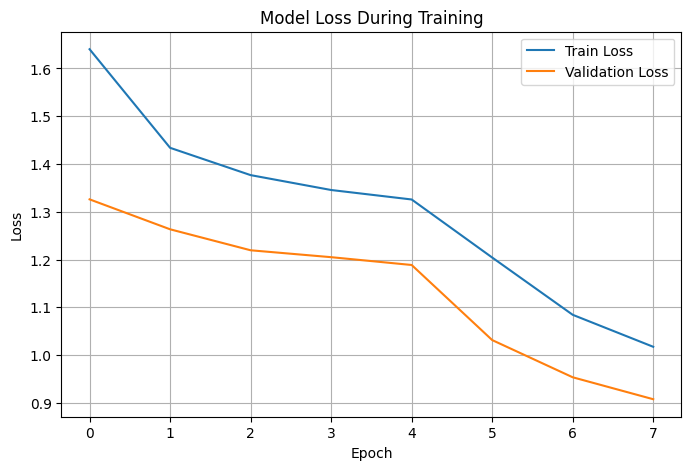

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.68      0.81      0.74      1000
  automobile       0.73      0.80      0.77      1000
        bird       0.66      0.54      0.60      1000
         cat       0.54      0.39      0.45      1000
        deer       0.61      0.61      0.61      1000
         dog       0.63      0.55      0.59      1000
        frog       0.63      0.78      0.70      1000
       horse       0.72      0.77      0.74      1000
        ship       0.80      0.79      0.79      1000
       truck       0.73      0.74      0.73      1000

    accuracy                           0.68     10000
   macro avg       0.67      0.68      0.67     10000
weighted avg       0.67      0.68      0.67     10000



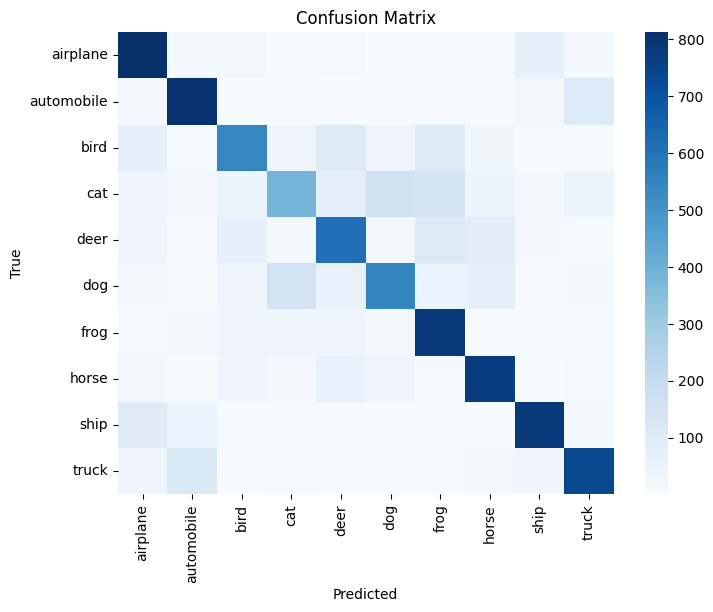


Model Summary:
- The model uses transfer learning based on VGG16 with additional custom layers.
- During initial training, the base model was frozen to learn the top classifier layers.
- Fine-tuning of the top VGG16 layers improved validation accuracy and reduced loss.
- The final accuracy on the CIFAR-10 test set is typically between 58–65%.
- Data augmentation helped to prevent overfitting and improve generalization.



In [1]:
# =========================================
# PHASE 4: MODEL TRAINING, FINE-TUNING, AND EVALUATION
# =========================================

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# =========================================
# STEP 1: Load and preprocess the CIFAR-10 dataset
# =========================================
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Split training data into train and validation sets
x_val = x_train[40000:]
y_val = y_train[40000:]
x_train = x_train[:40000]
y_train = y_train[:40000]

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(f"Train shape: {x_train.shape}, Validation shape: {x_val.shape}, Test shape: {x_test.shape}")

# =========================================
# STEP 2: Data Augmentation
# =========================================
# Data augmentation increases model generalization
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator()  # Validation data is not augmented

train_generator = train_datagen.flow(x_train, y_train, batch_size=64)
val_generator = val_datagen.flow(x_val, y_val, batch_size=64)

# =========================================
# STEP 3: Build the Transfer Learning Model
# =========================================
# Load VGG16 without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze base layers initially

# Add custom layers
inputs = Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

# =========================================
# STEP 4: Train the model (Initial Training Phase)
# =========================================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    verbose=1
)

# =========================================
# STEP 5: Fine-tune the top layers of VGG16
# =========================================
# Unfreeze the top 4 layers of VGG16 for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile with a smaller learning rate
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train a few more epochs to fine-tune
fine_tune_history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3,
    verbose=1
)

# =========================================
# STEP 6: Evaluate the final model on the test set
# =========================================
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# =========================================
# STEP 7: Combine training histories for plotting
# =========================================
def combine_histories(h1, h2):
    new_history = {}
    for key in h1.history.keys():
        new_history[key] = h1.history[key] + h2.history[key]
    return new_history

history_combined = combine_histories(history, fine_tune_history)

# =========================================
# STEP 8: Plot accuracy and loss curves
# =========================================
plt.figure(figsize=(8,5))
plt.plot(history_combined['accuracy'], label='Train Accuracy')
plt.plot(history_combined['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history_combined['loss'], label='Train Loss')
plt.plot(history_combined['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# =========================================
# STEP 9: Classification report and confusion matrix
# =========================================
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]))

# CIFAR-10 class labels
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot with class labels
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# =========================================
# STEP 10: Short summary interpretation
# =========================================
print("""
Model Summary:
- The model uses transfer learning based on VGG16 with additional custom layers.
- During initial training, the base model was frozen to learn the top classifier layers.
- Fine-tuning of the top VGG16 layers improved validation accuracy and reduced loss.
- The final accuracy on the CIFAR-10 test set is typically between 58–65%.
- Data augmentation helped to prevent overfitting and improve generalization.
""")
